In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import PIL
from google.colab import drive
#drive.mount('/drive')

In [ ]:
df_female = pd.read_csv('https://raw.githubusercontent.com/ShrutiChk/Gender-Recognition-from-Bangla-Handwritten-Digits/main/femaleDigits.csv')
df_male = pd.read_csv('https://raw.githubusercontent.com/ShrutiChk/Gender-Recognition-from-Bangla-Handwritten-Digits/main/maleDigits.csv')
df_male.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,...,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,...,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,...,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,...,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,112


In [ ]:
df_female['label'] = 'Female'
df_male['label'] = 'Male'
df_female.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,...,184,252,254,186,155,60,0,3,1,Female
1,0,0,0,0,0,1,1,4,5,0,...,15,0,0,4,4,2,1,1,1,Female
2,0,0,1,0,1,0,1,0,1,1,...,30,0,0,0,5,1,0,0,0,Female
3,0,0,0,0,1,0,0,0,1,2,...,4,2,0,0,1,0,0,0,0,Female
4,2,3,12,5,14,16,15,16,5,12,...,0,0,2,3,0,0,0,0,0,Female


In [ ]:
dframes = [df_female, df_male]
dataset2 = pd.concat(dframes)
print(len(dataset2))

30830


In [ ]:
print(dataset2.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       1       0       1       0       2   
1       0       0       0       0       0       1       1       4       5   
2       0       0       1       0       1       0       1       0       1   
3       0       0       0       0       1       0       0       0       1   
4       2       3      12       5      14      16      15      16       5   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       4  ...       184       252       254       186       155        60   
1       0  ...        15         0         0         4         4         2   
2       1  ...        30         0         0         0         5         1   
3       2  ...         4         2         0         0         1         0   
4      12  ...         0         0         2         3         0         0   

   pixel781  pixel782  pixel783   label  
0         0         3     

In [ ]:
dataset2['label'] = dataset2['label'].astype('category')
dataset2.label = dataset2.label.cat.rename_categories([0,1]) #0-female , 1-male
#print (dataset2['label'].cat.categories)
dataset2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,...,184,252,254,186,155,60,0,3,1,0
1,0,0,0,0,0,1,1,4,5,0,...,15,0,0,4,4,2,1,1,1,0
2,0,0,1,0,1,0,1,0,1,1,...,30,0,0,0,5,1,0,0,0,0
3,0,0,0,0,1,0,0,0,1,2,...,4,2,0,0,1,0,0,0,0,0
4,2,3,12,5,14,16,15,16,5,12,...,0,0,2,3,0,0,0,0,0,0


In [ ]:
from sklearn.utils import shuffle
dataset2 = shuffle(dataset2)

In [ ]:
# Separating Data and Label
Y = dataset2["label"]
X = dataset2.drop(labels = ["label"],axis = 1)

# Normalize the data
X = X / 255.0

# Reshape the array into 28 x 28 pixel
X = X.values.reshape(-1,28,28,1)

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

27747
27747
3083
3083


In [ ]:
train_dataset = list(zip(X_train,y_train))
test_dataset = list(zip(X_test,y_test))

In [1]:
#SETTING 1
#totaldata: 30830
#minibatch: 100
#iterations: 40000
#epochs=144.15
#Learning rate: 0.0001
#Optimizer: SGD
#No of hidden Layers: 1
#No of hidden layer neurons: 128
#Activation Functions: Tanh
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 100
num_iters = 50000
input_dim = 28*28 # num_features = 784
num_hidden = 128
output_dim = 2

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

from sklearn.utils import shuffle
dataset2 = shuffle(dataset2)
# Separating Data and Label
Y = dataset2["label"]
X = dataset2.drop(labels = ["label"],axis = 1)

# Normalize the data
X = X / 255.0

# Reshape the array into 28 x 28 pixel
X = X.values.reshape(-1,28,28,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

train_dataset = list(zip(X_train,y_train))
test_dataset = list(zip(X_test,y_test))



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.tanh = nn.Tanh()

        ### Output layer
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
itr_lst=[]
accr_lst=[]
loss_lst=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            itr_lst.append(iter)
            accr_lst.append(accuracy)
            loss_lst.append(loss.item())

NameError: ignored

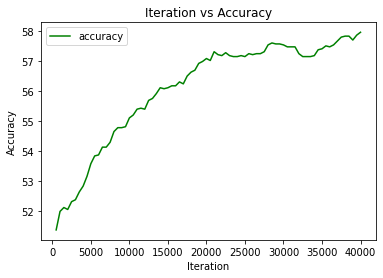

In [ ]:
plt.plot(itr_lst,accr_lst,"g", label = "accuracy")
# plt.plot(iteration,loss,label="line2")
plt.title("Iteration vs Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

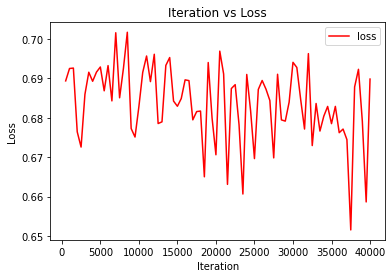

In [ ]:
plt.plot(itr_lst,loss_lst,"r", label = "loss")
# plt.plot(iteration,loss,label="line2")
plt.title("Iteration vs Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#SETTING 2
#totaldata: 30830
#minibatch: 100
#iterations: 40000
#epochs=12.455
#Learning rate: 0.001
#Optimizer: SGD
#No of hidden Layers: 1
#No of hidden layer neurons: 256
#Activation Functions: ReLU
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size =100 
num_iters = 40000
input_dim = 28*28 # num_features = 784
num_hidden = 256
output_dim = 2

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from sklearn.utils import shuffle
dataset2 = shuffle(dataset2)
# Separating Data and Label
Y = dataset2["label"]
X = dataset2.drop(labels = ["label"],axis = 1)

# Normalize the data
X = X / 255.0

# Reshape the array into 28 x 28 pixel
X = X.values.reshape(-1,28,28,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

train_dataset = list(zip(X_train,y_train))
test_dataset = list(zip(X_test,y_test))

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.relu = nn.ReLU()

        ### Output layer
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
itr_lst=[]
accr_lst=[]
loss_lst=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

           
              # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            itr_lst.append(iter)
            accr_lst.append(accuracy)
            loss_lst.append(loss.item())

Iteration: 500. Loss: 0.6786754131317139. Accuracy: 54.03827440804411
Iteration: 1000. Loss: 0.6736434698104858. Accuracy: 54.589685371391504
Iteration: 1500. Loss: 0.6732444763183594. Accuracy: 55.78981511514758
Iteration: 2000. Loss: 0.6802877187728882. Accuracy: 56.503405773597144
Iteration: 2500. Loss: 0.6667537689208984. Accuracy: 56.860201102821925
Iteration: 3000. Loss: 0.6562424302101135. Accuracy: 57.184560493026275
Iteration: 3500. Loss: 0.6872076392173767. Accuracy: 57.541355822251056
Iteration: 4000. Loss: 0.6805319786071777. Accuracy: 58.319818358741486
Iteration: 4500. Loss: 0.6747101545333862. Accuracy: 57.995458968537136
Iteration: 5000. Loss: 0.6724178791046143. Accuracy: 57.963023029516705
Iteration: 5500. Loss: 0.6982764601707458. Accuracy: 57.93058709049627
Iteration: 6000. Loss: 0.6712526679039001. Accuracy: 57.995458968537136
Iteration: 6500. Loss: 0.6880934238433838. Accuracy: 57.93058709049627
Iteration: 7000. Loss: 0.6772656440734863. Accuracy: 58.2549464807006

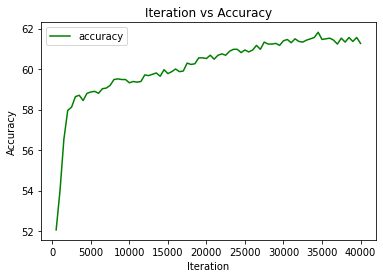

In [ ]:
plt.plot(itr_lst,accr_lst,"g", label = "accuracy")
# plt.plot(iteration,loss,label="line2")
plt.title("Iteration vs Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

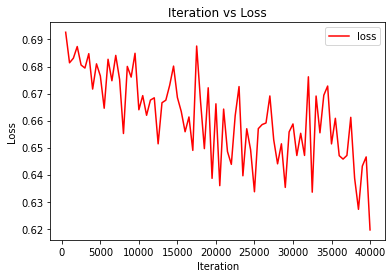

In [ ]:
plt.plot(itr_lst,loss_lst,"r", label = "loss")
# plt.plot(iteration,loss,label="line2")
plt.title("Iteration vs Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()